# 1. Image download and format change

In [1]:
url = 'https://cobslab.com/wp-content/uploads/2022/02/ai-009-1.jpg'

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import wget
from transformers import TFAutoModel, AutoTokenizer

In [3]:
image_path = tf.keras.utils.get_file('/content/image.jpg', origin=url)

In [4]:
image = tf.io.read_file(image_path)

In [5]:
#Raw binary string
#image

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0e\x0f\x10\x0f\x0e\x0c\x13\x13\x14\x14\x13\x13\x1c\x1b\x1b\x1b\x1c\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x1a\x15\x11\x15\x1a\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\xff\xc2\x00\x11\x08\x03\xb8\x04\x18\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x01\x03\x04\x05\x06\x07\x08\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xfc\xc6\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd3\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [6]:
#Tensor decoding
image = tf.image.decode_jpeg(image, channels=3)

In [7]:
image

<tf.Tensor: shape=(952, 1048, 3), dtype=uint8, numpy=
array([[[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       ...,

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]],

       [[ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39],
        ...,
        [ 1, 10, 39],
        [ 1, 10, 39],
        [ 1, 10, 39]]], dtype=uint8)>

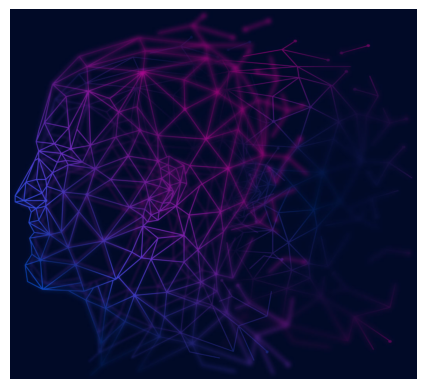

In [8]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
#sample RGB image, value of RGB is normally 8bit so, it' has value rang from 0 to 255
rgb_image = tf.random.uniform([100, 100, 3], maxval=255, dtype=tf.float32)
print(rgb_image)

tf.Tensor(
[[[208.90984    54.310028  116.417305 ]
  [102.241234  155.01065   246.00293  ]
  [250.10228    60.98153   146.6287   ]
  ...
  [  2.0484548  58.276745  147.37901  ]
  [ 99.51469    51.13006   154.70839  ]
  [166.96474    88.35174   185.44832  ]]

 [[216.48933    66.6905    206.40067  ]
  [236.21846    81.83113    90.03824  ]
  [231.69728   199.25414   207.63649  ]
  ...
  [153.04636   140.73137    47.217907 ]
  [ 37.285088  138.62245   138.01514  ]
  [185.37341   216.23001   204.64337  ]]

 [[228.67638   234.8129     28.054686 ]
  [106.22625   175.92798   135.04402  ]
  [200.74681    60.957302  208.17535  ]
  ...
  [193.90123   188.47916    76.786644 ]
  [ 14.588755  225.25417   222.51605  ]
  [152.9586    154.9369    128.33507  ]]

 ...

 [[ 67.209946  214.84834   226.17238  ]
  [ 38.12168   236.57445    98.1522   ]
  [ 77.14066   195.52568     2.2010546]
  ...
  [163.12047   139.16884   118.99089  ]
  [162.62183   181.51854   171.89195  ]
  [ 46.56948    70.56826   175.44

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


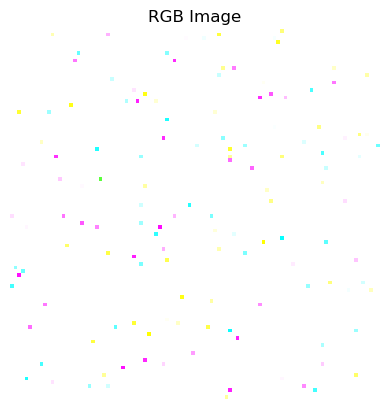

In [10]:
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')
plt.show()

(100, 100, 1)


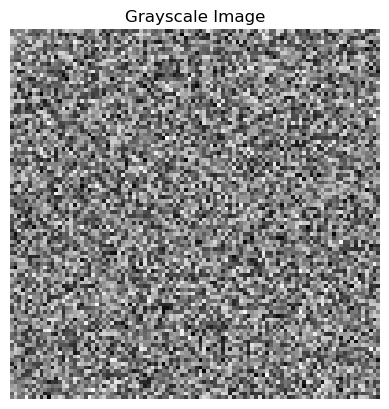

In [11]:
# rgb_tograyscale change RGB image to grayscale
grayscale_image = tf.image.rgb_to_grayscale(rgb_image)

print(grayscale_image.shape)
plt.imshow(grayscale_image.numpy().squeeze(), cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [12]:
#We can change grey scale manually
R = rgb_image[0][0][0]
G = rgb_image[0][0][1]
B = rgb_image[0][0][2]
Y = R + G + B
print(grayscale_image[0][0], Y)

tf.Tensor([107.59472], shape=(1,), dtype=float32) tf.Tensor(379.63715, shape=(), dtype=float32)


In [13]:
# rgb to hsv
hsv_image = tf.image.rgb_to_hsv(rgb_image)
hue_channel = hsv_image[:,:,0]

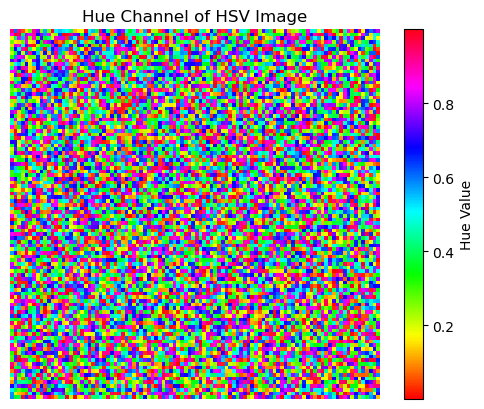

In [14]:
plt.imshow(hue_channel, cmap='hsv')
plt.title('Hue Channel of HSV Image')
plt.axis('off')
plt.colorbar(label='Hue Value')
plt.show()

# 2. Image Normalization and Standardization

In [15]:
#Normalization
normalized_image = rgb_image / 255.0
rgb_image[0][0], normalized_image[0][0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([208.90984 ,  54.310028, 116.417305], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8192543 , 0.21298051, 0.45653844], dtype=float32)>)

In [16]:
#Standardization
mean = tf.reduce_mean(rgb_image)
stddev = tf.math.reduce_std(rgb_image)

In [17]:
standardized_image = (rgb_image - mean) / stddev
rgb_image[0][0], standardized_image[0][0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([208.90984 ,  54.310028, 116.417305], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.0995038 , -0.99556845, -0.15391654], dtype=float32)>)

# 3. Image Handling

## 3-1. Image Filtering

### 3-1-1. Median Filtering

In [18]:
def generate_salt_noise(image):
    num_salt = np.ceil(0.05 * image.size)
    coords = [np.random.randint(0, i -1, int(num_salt)) for i in image.shape] #salt noise 255, pepper noise 0
    salted_image = image.copy()
    salted_image[coords[0], coords[1]] = 255
    return salted_image

In [19]:
def generate_pepper_noise(image):
    num_pepper = np.ceil(0.05 * image.size)
    coords = [np.random.randint(0, i -1, int(num_pepper)) for i in image.shape] #salt noise 0, pepper noise 255
    peppered_image = image.copy()
    peppered_image[coords[0], coords[1]] = 0
    return peppered_image

--2024-09-07 15:51:41--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462729 (1.4M) [image/png]
Saving to: 'like_lenna.png.8'

     0K .......... .......... .......... .......... ..........  3% 1.67M 1s
    50K .......... .......... .......... .......... ..........  7% 2.24M 1s
   100K .......... .......... .......... .......... .......... 10% 8.43M 0s
   150K .......... .......... .......... .......... .......... 14% 1.80M 1s
   200K .......... .......... .......... .......... .......... 17% 9.06M 0s
   250K .......... .......... .......... .......... .......... 21% 6.30M 0s
   300K .......... .......... .......... .......... .......... 24% 3.95M 0s
   350K .......... .......

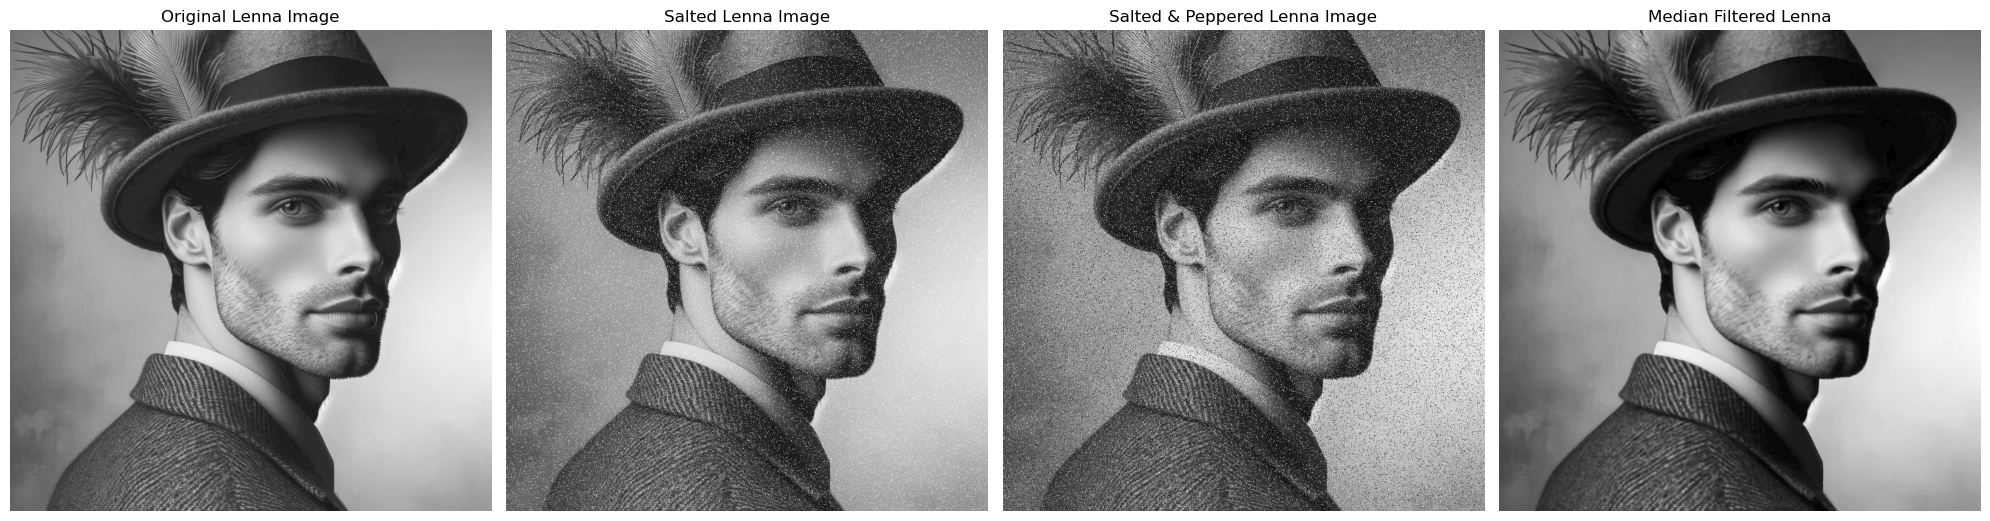

In [20]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
lenna_image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)

salted_lenna =   generate_salt_noise(lenna_image)
peppered_lenna = generate_pepper_noise(salted_lenna)
filtered_lenna = cv2.medianBlur(peppered_lenna, 5) # 5*5 filter

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

axes[0].imshow(lenna_image, cmap='gray')
axes[0].set_title('Original Lenna Image')
axes[0].axis('off')

axes[1].imshow(salted_lenna, cmap='gray')
axes[1].set_title('Salted Lenna Image')
axes[1].axis('off')

axes[2].imshow(peppered_lenna, cmap='gray')
axes[2].set_title('Salted & Peppered Lenna Image')
axes[2].axis('off')

axes[3].imshow(filtered_lenna, cmap='gray')
axes[3].set_title('Median Filtered Lenna')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### 3-1-2. Gausian Filtering

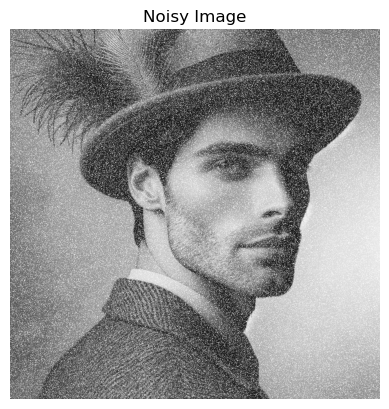

In [21]:
#Gausian filter

image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
mean = 0
sigma =1
gaussian_noise=np.random.normal(mean, sigma, image.shape).astype('uint8')
noisy_image = cv2.add(image, gaussian_noise)

plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

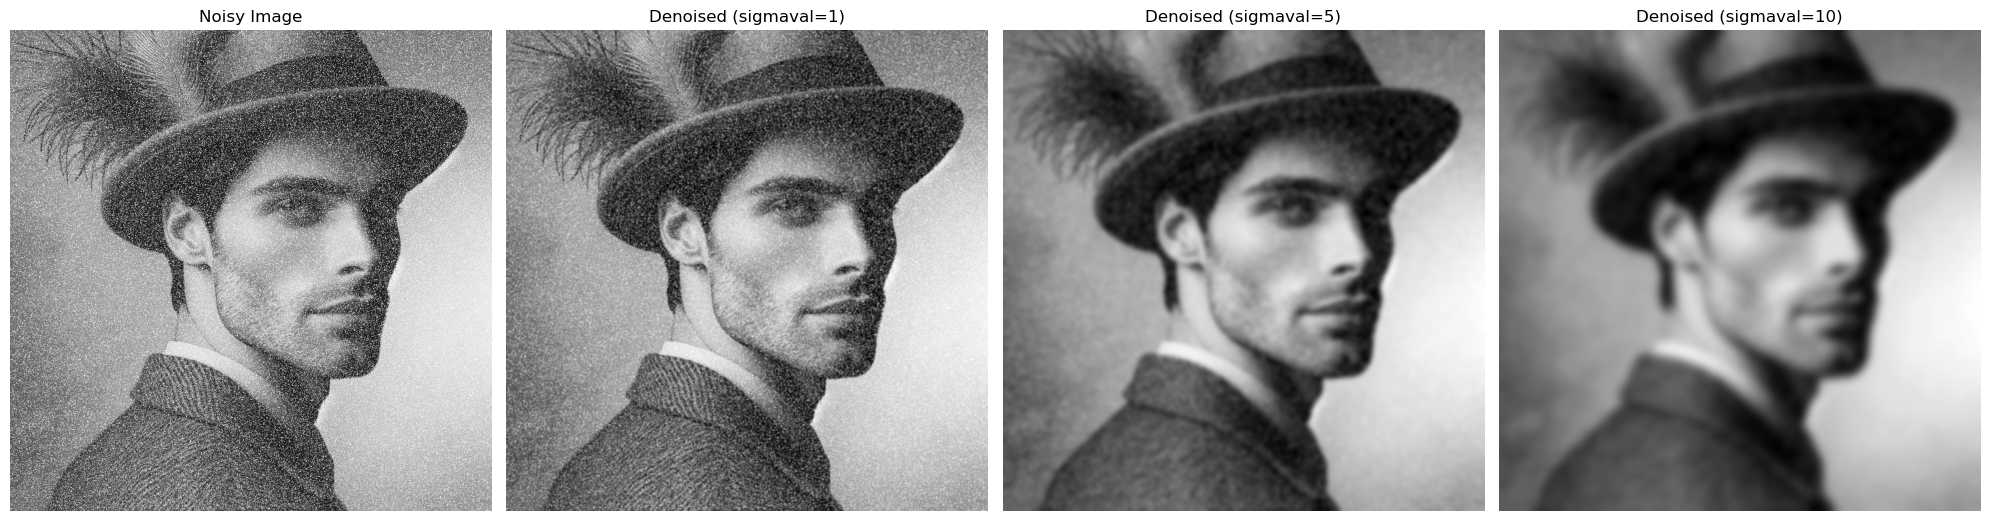

In [22]:
sigma_values = [1,5,10]
denoised_images = []

for sigma in sigma_values:
    denoised = cv2.GaussianBlur(noisy_image, (0,0), sigma)
    denoised_images.append(denoised)

fig, axes = plt.subplots(1, 4, figsize=(20,10))

axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')

for ax, img, sigma in zip(axes[1:], denoised_images, sigma_values):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Denoised (sigmaval={sigma})')
    ax.axis('off')

plt.tight_layout()
plt.show

Sigma value increase, more blur effect

## 3-2. Image Change

### 3-2-1. Affine Transformations: resize, roation and shift

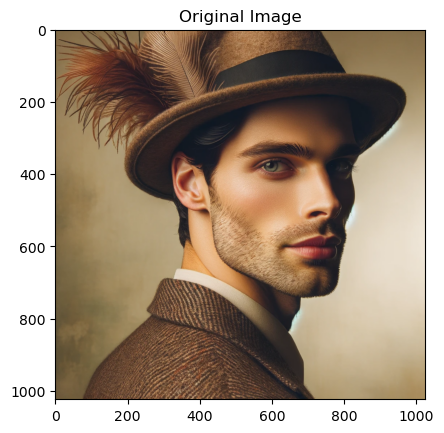

In [23]:
image_path = "like_lenna.png"
img = cv2.imread(image_path)

#초창기 open CV 가 개발될 당시 대부분의 디지털 카메라에서 일반적으로 사용되는 포맷 BGR 이었습니다. 그래서 이 과정이 필요.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.show()

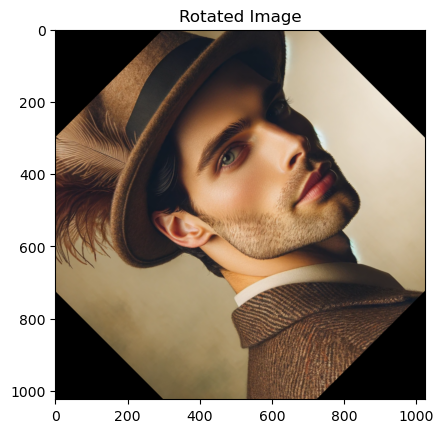

In [24]:
def rotate_image(image, angle, center=None):
    rows, cols, _ = image.shape
    if center is None:
        center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(image, M, (cols,rows))
    return rotated

rotated_img = rotate_image(img, 45)
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.show()

### 3-2-2. PersAffine Transformations: resize, roation and shift